# Feature Selection in Machine Learning

Feature selection is an essential process in machine learning that helps reduce the complexity of models, improve performance, and decrease the risk of overfitting. It involves identifying and selecting the most relevant features for the model while removing irrelevant or redundant ones. Feature selection techniques can be categorized based on whether the learning is supervised or unsupervised.

## 1. Supervised Learning Feature Selection

In supervised learning, feature selection relies on the target variable to select the most relevant features. 

### 1.1. Filter Methods
Filter methods evaluate each feature individually by its correlation with the target variable. These methods do not use machine learning models, but rather rely on statistical tests.

#### a. **Correlation Matrix**
Correlation *measures the relationship between features and the target variable*. Features with high correlation to the target are retained, while others are discarded.

![Correlation.png](../images//Correlation.png)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


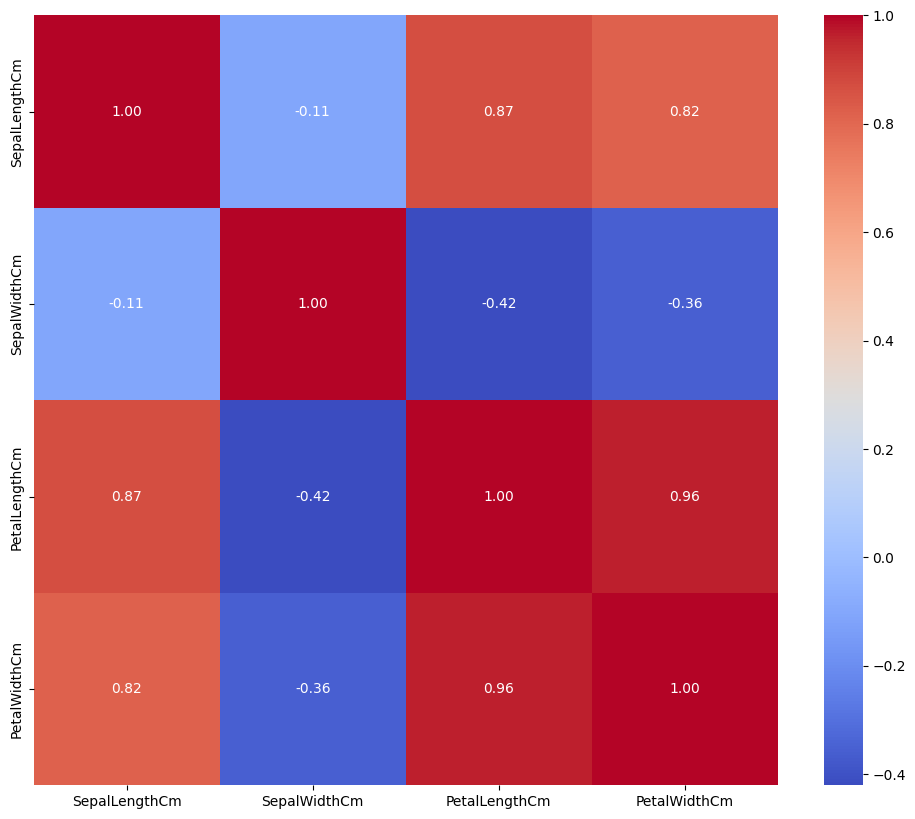

In [115]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Load dataset 
data = pd.read_csv("../datasets/Iris.csv") 
data = data.drop(["Species", "Id"], axis="columns")

# Calculate correlation matrix 
corr_matrix = data.corr() 
print(corr_matrix)

# Plot correlation heatmap 
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f") 
plt.show()

#### b. **Chi-Squared Test (For Categorical Features)**
The Chi-squared test evaluates the statistical dependence between categorical features and the target variable.

In [116]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
from sklearn.datasets import load_iris 

# Load Iris dataset 
X, y = load_iris(return_X_y=True) 

# Apply SelectKBest with Chi-squared test 
selector = SelectKBest(chi2, k=2) 
X_new = selector.fit_transform(X, y) 

# Get selected feature indices 
print("Selected features:", selector.get_support())

Selected features: [False False  True  True]


#### c. **ANOVA F-Test (For Numerical Features)**

ANOVA F-test assesses the importance of numerical features with respect to the target variable by comparing variances.

In [117]:
from sklearn.feature_selection import f_classif 
from sklearn.datasets import load_iris 

# Load Iris dataset 
X, y = load_iris(return_X_y=True) 

# Apply F-test 
F_values, p_values = f_classif(X, y) 

# Print the F-values and p-values 
print("F-values:", F_values) 
print("P-values:", p_values) 

F-values: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
P-values: [1.66966919e-31 4.49201713e-17 2.85677661e-91 4.16944584e-85]


#### d. **Mutual Information (MI)**

Mutual information measures the dependency between two variables and can be used to select the most informative features.

In [118]:
from sklearn.feature_selection import mutual_info_classif 
from sklearn.datasets import load_iris 

# Load dataset 
X, y = load_iris(return_X_y=True) 

# Calculate Mutual Information 
mi = mutual_info_classif(X, y) 
print("Mutual information scores:", mi)

Mutual information scores: [0.46792145 0.20973637 0.98092163 0.99652341]


### 1.2. Wrapper Methods

Wrapper methods evaluate feature subsets based on model performance. They train a model using different combinations of features and evaluate their performance.

#### a. **Recursive Feature Elimination (RFE)**

RFE recursively removes the least significant features based on model performance.

In [119]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import load_iris 

# Load Iris dataset 
X, y = load_iris(return_X_y=True) 

# Initialize logistic regression model 
model = LogisticRegression(max_iter=200) 

# Initialize RFE 
rfe = RFE(estimator=model, n_features_to_select=2) 

# Select 2 features 
X_rfe = rfe.fit_transform(X, y) 

# Get selected features 
print("Selected features:", rfe.support_)

Selected features: [False False  True  True]


#### b. **Recursive Feature Elimination with Cross-Validation (RFECV)**

RFECV performs RFE with cross-validation to select the optimal number of features.

In [120]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import load_iris 

# Load Iris dataset 
X, y = load_iris(return_X_y=True) 

# Initialize logistic regression model 
model = LogisticRegression(max_iter=200) 

# Initialize RFECV 
rfecv = RFECV(estimator=model, step=1, cv=5)
X_rfecv = rfecv.fit_transform(X, y) 

# Get selected features 
print("Optimal number of features:", rfecv.n_features_)
print("Features:", rfecv.get_feature_names_out())
print("Values:", rfecv.cv_results_)



Optimal number of features: 4
Features: ['x0' 'x1' 'x2' 'x3']
Values: {'mean_test_score': array([0.95333333, 0.96      , 0.96666667, 0.97333333]), 'std_test_score': array([0.04      , 0.02494438, 0.02108185, 0.02494438]), 'split0_test_score': array([0.93333333, 0.96666667, 0.96666667, 0.96666667]), 'split1_test_score': array([1.        , 0.96666667, 0.96666667, 1.        ]), 'split2_test_score': array([0.9       , 0.93333333, 0.93333333, 0.93333333]), 'split3_test_score': array([0.93333333, 0.93333333, 0.96666667, 0.96666667]), 'split4_test_score': array([1., 1., 1., 1.]), 'n_features': array([1, 2, 3, 4])}


### 1.3. Embedded Methods

Embedded methods perform feature selection during the model training process. They integrate feature selection as part of the model fitting.

#### a. **Lasso Regression (L1 Regularization)**

Lasso regression applies L1 regularization, which drives the coefficients of less important features to zero, effectively removing them.

In [121]:
from sklearn.linear_model import Lasso 
from sklearn.datasets import load_diabetes
import numpy as np 

# Load Boston dataset 
X, y = load_diabetes(return_X_y=True) 

# Apply Lasso Regression 
lasso = Lasso(alpha=0.01) 
lasso.fit(X, y) 

# Get selected features (non-zero coefficients) 
selected_features = np.where(lasso.coef_ != 0)[0] 
print("Selected features:", selected_features) 

Selected features: [0 1 2 3 4 5 6 7 8 9]


#### b. **Random Forest Feature Importance**

Random Forests evaluate the importance of features based on how much they contribute to the prediction accuracy.

In [122]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import load_iris 

# Load dataset 
X, y = load_iris(return_X_y=True) 

# Train Random Forest model 
model = RandomForestClassifier() 
model.fit(X, y) 

# Get feature importances 
importances = model.feature_importances_ 
print("Feature importances:", importances)

Feature importances: [0.10038576 0.01905847 0.34995451 0.53060126]


#### c. **Gradient Boosting Feature Importance**

Similar to Random Forests, Gradient Boosting models also evaluate feature importance based on how much they contribute to the model’s prediction accuracy.

In [123]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.datasets import load_iris 

# Load dataset 
X, y = load_iris(return_X_y=True) 

# Train Gradient Boosting model 
model = GradientBoostingClassifier() 
model.fit(X, y) 

# Get feature importances 
importances = model.feature_importances_ 
print("Feature importances:", importances)

Feature importances: [0.00765704 0.00904542 0.3297717  0.65352584]


##
---

## Example With `Mutual Information Method`

## **For Regression Problem**

- **mutual_info_regression** : Used for regression problems

In [124]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
import pandas as pd
import matplotlib.pyplot as plt

- Genarate the sample dataset

In [125]:
# generate dataset
X, y = make_regression(n_samples=50, n_features=5)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4
0,-0.219600,-1.394225,-0.169488,-0.589367,0.240822
1,0.361618,-0.928630,0.117749,0.346551,-0.188644
2,-0.316902,0.075845,-0.584641,-0.663787,-0.717227
3,-1.317252,-1.434010,-0.421910,-0.153751,-1.994501
4,0.011482,-1.125913,0.266918,-0.646389,-0.948851


In [126]:
fs = SelectKBest(score_func=mutual_info_regression, k=3)
fs.fit(X,y)

SelectKBest(k=3,
            score_func=<function mutual_info_regression at 0x0000017A87B9B420>)

In [127]:
fs.scores_

array([0.06284892, 0.02726924, 0.        , 0.20122993, 0.        ])

<Axes: >

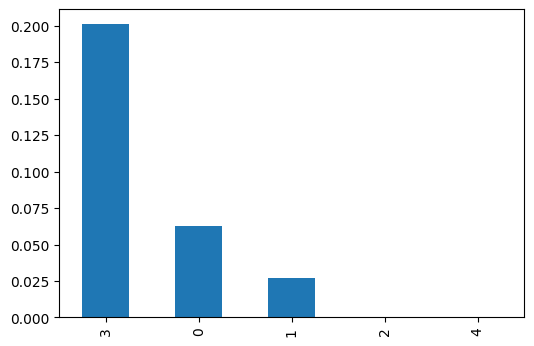

In [128]:
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))

In [129]:
X_selected = fs.fit_transform(X, y)
X_selected = pd.DataFrame(X_selected)

In [130]:
X_selected.head()

,0,1,2
0,-0.219600,-1.394225,-0.589367
1,0.361618,-0.928630,0.346551
2,-0.316902,0.075845,-0.663787
3,-1.317252,-1.434010,-0.153751
4,0.011482,-1.125913,-0.646389


In [131]:
X.head()

,0,1,2,3,4
0,-0.219600,-1.394225,-0.169488,-0.589367,0.240822
1,0.361618,-0.928630,0.117749,0.346551,-0.188644
2,-0.316902,0.075845,-0.584641,-0.663787,-0.717227
3,-1.317252,-1.434010,-0.421910,-0.153751,-1.994501
4,0.011482,-1.125913,0.266918,-0.646389,-0.948851


##
---

## **For Clasification Problem**

- **mutual_info_classif** : Used for classification problems

In [132]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Select top K features
from sklearn.feature_selection import SelectKBest

# To get mutual score in classification dataset
from sklearn.feature_selection import mutual_info_classif

- Genarate the sample dataset

In [133]:
# Generate Dataset
X, y = make_classification(n_samples=50, n_features=5, n_informative=2)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4
0,-1.221588,-2.125925,0.002313,-1.591220,0.736918
1,-1.110811,-1.494888,-2.679879,-1.707025,0.564118
2,-1.385462,-2.127317,-1.734135,-1.973112,0.283660
3,-0.311967,-0.741817,1.217818,-0.288315,0.646730
4,0.417833,0.431266,1.809958,0.719871,0.470356


In [134]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
fs.fit(X,y)

SelectKBest(k=3,
            score_func=<function mutual_info_classif at 0x0000017A87B9B560>)

In [135]:
fs.scores_

array([0.05111008, 0.13233302, 0.41650956, 0.08530055, 0.        ])

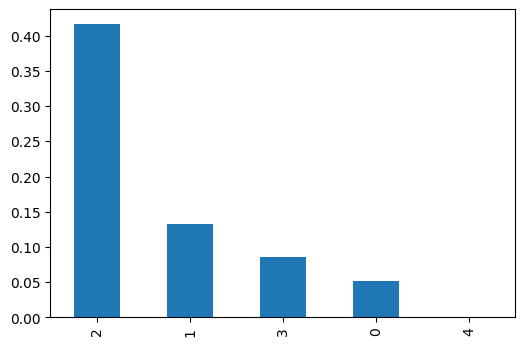

In [136]:
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))
plt.show()

In [137]:
selected_X = fs.fit_transform(X,y)
selected_X = pd.DataFrame(selected_X)
selected_X.head()

,0,1,2
0,-2.125925,0.002313,-1.591220
1,-1.494888,-2.679879,-1.707025
2,-2.127317,-1.734135,-1.973112
3,-0.741817,1.217818,-0.288315
4,0.431266,1.809958,0.719871


In [138]:
X.head()

,0,1,2,3,4
0,-1.221588,-2.125925,0.002313,-1.591220,0.736918
1,-1.110811,-1.494888,-2.679879,-1.707025,0.564118
2,-1.385462,-2.127317,-1.734135,-1.973112,0.283660
3,-0.311967,-0.741817,1.217818,-0.288315,0.646730
4,0.417833,0.431266,1.809958,0.719871,0.470356


##
---

## 2. Unsupervised Learning Feature Selection

In unsupervised learning, there is no target variable. Feature selection methods rely on the structure and patterns in the data itself.

### 2.1. Filter Methods

#### a. **Principal Component Analysis (PCA)**

PCA reduces the dimensionality of the dataset by projecting the data onto a smaller set of uncorrelated components that explain the most variance.

In [139]:
from sklearn.decomposition import PCA 
from sklearn.datasets import load_iris 

# Load dataset 
X, y = load_iris(return_X_y=True) 

# Apply PCA 
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X) 

# Print explained variance 
print("Explained variance ratio:", pca.explained_variance_ratio_) 

Explained variance ratio: [0.92461872 0.05306648]


#### b. **Variance Threshold**

This method `removes features with low variance`, assuming they carry little information for clustering or unsupervised tasks.

![Variance.png](../images/variance.png)

In [140]:
from sklearn.feature_selection import VarianceThreshold 
from sklearn.datasets import load_iris 

# Load dataset 
X, y = load_iris(return_X_y=True) 

# Apply variance threshold 
selector = VarianceThreshold(threshold=0.1) 
X_selected = selector.fit_transform(X) 

# Print selected features 
print("Selected features shape:", X_selected.shape)

Selected features shape: (150, 4)


### 2.2. Wrapper Methods

#### a. **Genetic Algorithms**

Genetic algorithms can search for optimal feature subsets by using principles of natural selection, such as mutation, crossover, and selection.

Libraries like DEAP can be used for implementing genetic algorithms to perform feature selection.

##
---

## Example

In [141]:
import pandas as pd

data = pd.DataFrame({'Math':[70, 60, 40, 80, 30],
                    'Chemistry':[60, 80, 65, 55, 60],
                    'Maths':[70, 60, 40, 80, 30],
                    'Physics':[50, 50, 50, 50, 50],
                    'General_Test':[70, 70, 60, 60, 80]})

data

,Math,Chemistry,Maths,Physics,General_Test
0,70,60,70,50,70
1,60,80,60,50,70
2,40,65,40,50,60
3,80,55,80,50,60
4,30,60,30,50,80


## **Variance Threshold Method** 

In [142]:
from sklearn.feature_selection import VarianceThreshold

In [143]:
selector = VarianceThreshold(threshold=0) # threshold=0 => Remove variance = 0 column/s
selected_features = selector.fit_transform(data)

In [144]:
selector.get_feature_names_out()

array(['Math', 'Chemistry', 'Maths', 'General_Test'], dtype=object)

In [145]:
data = pd.DataFrame(selected_features, columns=selector.get_feature_names_out()) 
data

,Math,Chemistry,Maths,General_Test
0,70,60,70,70
1,60,80,60,70
2,40,65,40,60
3,80,55,80,60
4,30,60,30,80


## **Pearson Correlation Method**

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

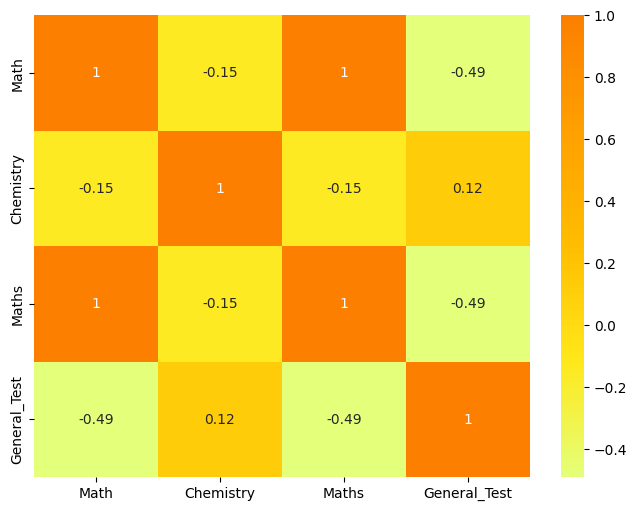

In [147]:
#Using Pearson Correlation
cor = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='Wistia')
plt.show()

In [148]:
cor.columns

Index(['Math', 'Chemistry', 'Maths', 'General_Test'], dtype='object')

In [149]:
corr_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.9:
            colname = cor.columns[i]
            corr_features.add(colname)

corr_features

{'Maths'}

In [150]:
data = data.drop(corr_features, axis=1)
data

,Math,Chemistry,General_Test
0,70,60,70
1,60,80,70
2,40,65,60
3,80,55,60
4,30,60,80


##
---

## 3. Advanced Methods

### 3.1. Boruta Algorithm

Boruta is an advanced feature selection method that is particularly useful for random forests. It works by comparing the importance of features to randomized copies (shadow features) and selects only features that are more important than the shadow features.

```python
from boruta import BorutaPy 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import load_iris 

# Load dataset 
X, y = load_iris(return_X_y=True) 

# Train a random forest classifier 
rf = RandomForestClassifier(n_jobs=-1, max_depth=5) 

# Initialize Boruta feature selector 
boruta = BorutaPy(rf, n_estimators='auto', random_state=42) 

# Fit Boruta 
boruta.fit(X, y) 

# Get selected features 
print("Selected features:", boruta.support_)
```

### 3.2. Mutual Information (MI)

Mutual information measures the dependency between two variables and can be used to select the most informative features.

In [151]:
from sklearn.feature_selection import mutual_info_classif 
from sklearn.datasets import load_iris 

# Load dataset 
X, y = load_iris(return_X_y=True) 

# Calculate Mutual Information 
mi = mutual_info_classif(X, y) 
print("Mutual information scores:", mi)

Mutual information scores: [0.52687784 0.21828575 0.98162875 0.99955973]


### 3.3. **XG Boost Feature Importance**

XGBoost is a popular machine learning algorithm for classification and regression, and it provides built-in methods for evaluating feature importance.

```python
import xgboost as xgb 
from sklearn.datasets import load_iris 

# Load dataset 
X, y = load_iris(return_X_y=True) 

# Train XGBoost model 
model = xgb.XGBClassifier() 
model.fit(X, y) 

# Get feature importance 
xgb.plot_importance(model) 
```

##
---

## 4. Conclusion

Feature selection is critical for improving the performance of machine learning models. The right method depends on the type of data (supervised vs. unsupervised) and the problem at hand. Implementing these methods efficiently can significantly enhance model accuracy and interpretability.

By understanding and using these techniques, you'll be able to make more informed decisions about the features that contribute most to your machine learning models, ultimately improving model performance.